In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
N = 512 # sample数
dt = 0.01  # サンプリング周期
freq = 5  # Hz
amp = 1  # 振幅

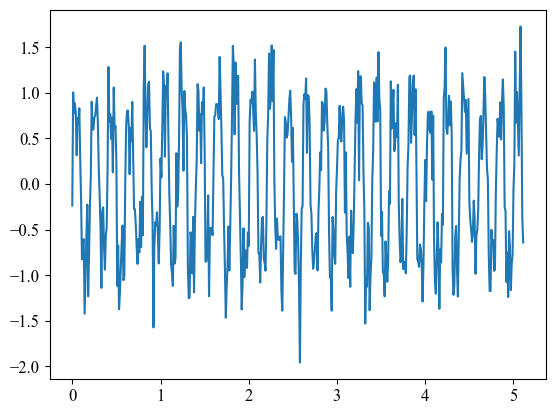

In [230]:
t = np.arange(0, N*dt, dt)  # 時間軸
# f = amp * np.sin(2*np.pi*freq*t) + np.random.randn(N)*0.01  # 信号
f = amp * np.sin(2*np.pi*freq*t) + amp/3 * np.sin(2*np.pi*freq*3*t) + np.random.randn(N)*0.3
plt.plot(t, f)
plt.show()

In [231]:
# 高速フーリエ変換
F = np.fft.fft(f)
F[:5]

array([12.28004338+0.j        ,  4.2294249 -7.2841974j ,
       -0.80908999+2.36829652j,  7.32461941+5.97870493j,
        3.00301832+3.46944211j])

In [232]:
# 複素数を絶対値に変換
F_abs = np.abs(F)
F_abs[:5]

array([12.28004338,  8.42303786,  2.50268956,  9.45489091,  4.58858884])

In [233]:
F_abs_amp = F_abs / N *2 # 振幅を元の信号に揃える　交流成分2倍
F_abs_amp[0] = F_abs_amp[0] / 2  # 振幅を元の信号に揃える 直流成分非2倍

In [234]:
# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N)
fq

array([  0.        ,   0.19569472,   0.39138943,   0.58708415,
         0.78277886,   0.97847358,   1.1741683 ,   1.36986301,
         1.56555773,   1.76125245,   1.95694716,   2.15264188,
         2.34833659,   2.54403131,   2.73972603,   2.93542074,
         3.13111546,   3.32681018,   3.52250489,   3.71819961,
         3.91389432,   4.10958904,   4.30528376,   4.50097847,
         4.69667319,   4.89236791,   5.08806262,   5.28375734,
         5.47945205,   5.67514677,   5.87084149,   6.0665362 ,
         6.26223092,   6.45792564,   6.65362035,   6.84931507,
         7.04500978,   7.2407045 ,   7.43639922,   7.63209393,
         7.82778865,   8.02348337,   8.21917808,   8.4148728 ,
         8.61056751,   8.80626223,   9.00195695,   9.19765166,
         9.39334638,   9.5890411 ,   9.78473581,   9.98043053,
        10.17612524,  10.37181996,  10.56751468,  10.76320939,
        10.95890411,  11.15459883,  11.35029354,  11.54598826,
        11.74168297,  11.93737769,  12.13307241,  12.32

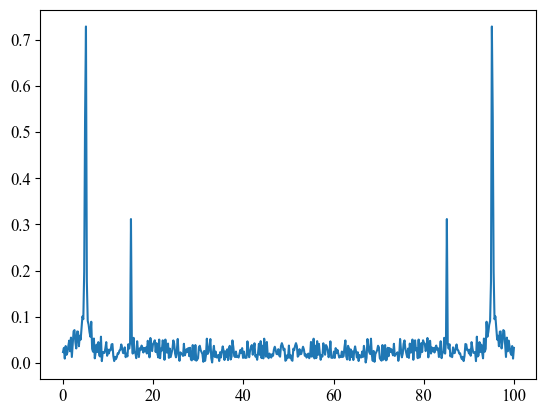

In [235]:
# オリジナル信号 -> FFT
plt.plot(fq, F_abs_amp)
plt.show()

In [236]:
# フィルタリング1 : 周波数でカット
F2 = np.copy(F)
fc = 10  # カットオフ
F2[(fq>fc)]  = 0
F2_abs = np.abs(F2)
F2_abs_amp = F2_abs/N*2
F2_abs_amp[0] = F2_abs_amp[0] / 2
F2_ifft = np.fft.ifft(F2)
F2_ifft_real = F2_ifft.real * 2

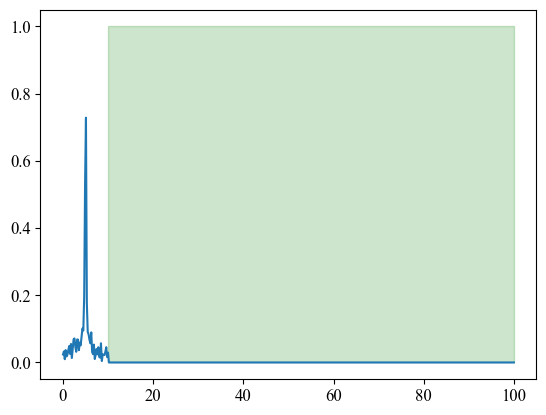

In [237]:
# オリジナル信号 -> FFT -> 周波数filter
plt.fill_between([fc, 100], [0, 0], [1, 1], color='g', alpha=0.2)
plt.plot(fq, F2_abs_amp)
plt.show()

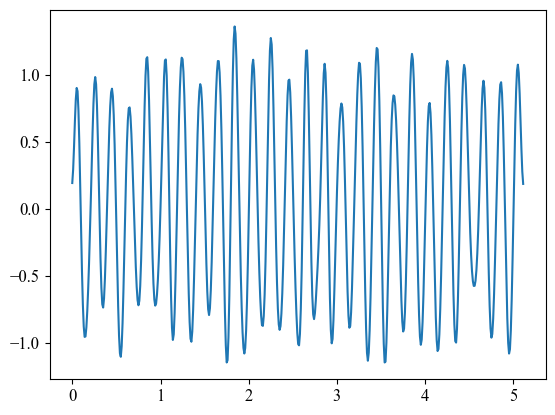

In [238]:
# オリジナル信号 -> FFT -> 周波数filter -> IFFT
plt.plot(t, F2_ifft_real)
plt.show()

In [249]:
# フィルタリング2 : 振幅強度でカット
F3 = np.copy(F)
ac = 0.01  # 振幅強度の閾値
F3[(F_abs_amp) < ac] = 0
F3[(fq > fc)]  = 0
F3_abs = np.abs(F3)
F3_abs_amp = F3_abs/N*2
F3_abs_amp[0] = F3_abs_amp[0] / 2
F3_ifft = np.fft.ifft(F3)
F3_ifft_real = F3_ifft.real

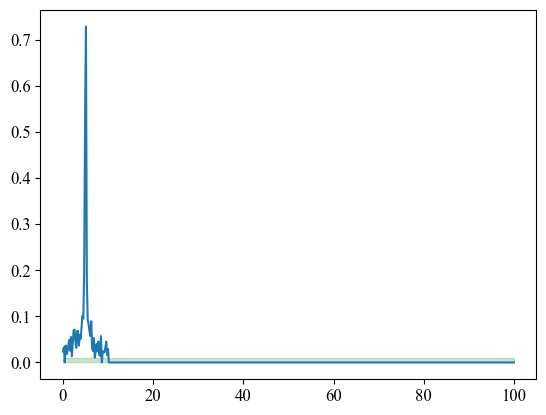

In [250]:
# オリジナル信号 -> FFT -> 振幅filter
plt.fill_between([0, 100], [0, 0], [ac, ac], color='g', alpha=0.2)
plt.plot(fq, F3_abs_amp)
plt.show()

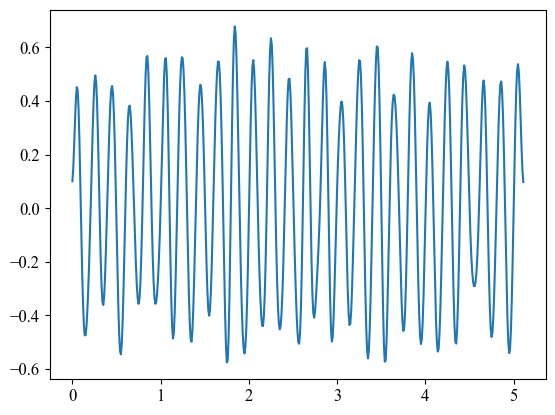

In [251]:
# オリジナル信号 -> FFT -> 振幅filter -> IFFT
plt.plot(t, F3_ifft_real)
plt.show()

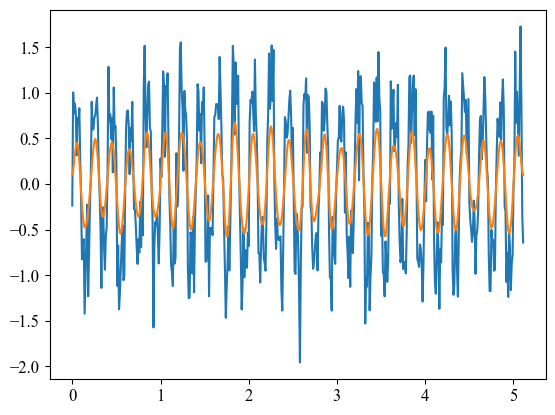

In [252]:
plt.plot(t, f)
plt.plot(t, F3_ifft_real)
plt.show()

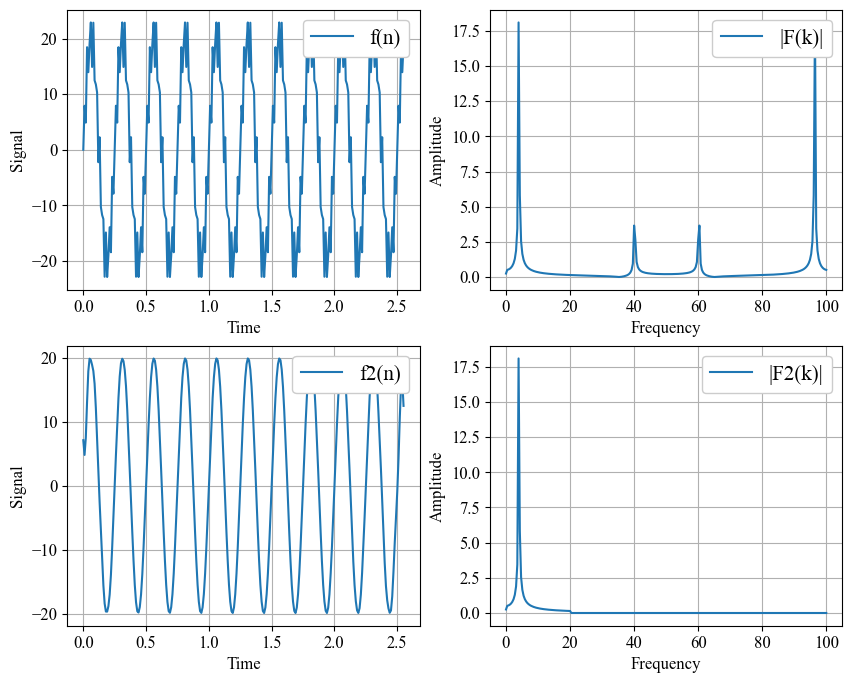

In [138]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

# データのパラメータ
N = 256            # サンプル数
dt = 0.01          # サンプリング間隔
fq1, fq2 = 4, 40    # 周波数
fc = 20  # カットオフ周波数
A1, A2 = 20, 5
t = np.arange(0, N*dt, dt)  # 時間軸
freq = np.linspace(0, 1.0/dt, N)  # 周波数軸

# 時間信号（周波数5の正弦波 + 周波数40の正弦波）の生成
f1 = A1 * np.sin(2 * np.pi * fq1 * t)
f2 = A2 * np.sin(2 * np.pi * fq2 * t)
f = f1 + f2

# 高速フーリエ変換（周波数信号に変換）
F = np.fft.fft(f)

# 正規化 + 交流成分2倍
F = F/(N/2)
F[0] = F[0]/2

# 配列Fをコピー
F2 = F.copy()

# ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする）
F2[(freq > fc)] = 0

# 高速逆フーリエ変換（時間信号に戻す）
f2 = np.fft.ifft(F2)

# 振幅を元のスケールに戻す
f2 = np.real(f2*N)

# グラフ表示
fig = plt.figure(figsize=(10.0, 8.0))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 時間信号（元）
plt.subplot(221)
plt.plot(t, f, label='f(n)')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

# 周波数信号(元)
plt.subplot(222)
plt.plot(freq, np.abs(F), label='|F(k)|')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

# 時間信号(処理後)
plt.subplot(223)
plt.plot(t, f2, label='f2(n)')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

# 周波数信号(処理後)
plt.subplot(224)
plt.plot(freq, np.abs(F2), label='|F2(k)|')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)